In [ ]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
       BatchNorm2d-2           [-1, 32, 26, 26]              64
              ReLU-3           [-1, 32, 26, 26]               0
         AvgPool2d-4           [-1, 32, 13, 13]               0
           Dropout-5           [-1, 32, 13, 13]               0
            Conv2d-6           [-1, 16, 11, 11]           4,624
       BatchNorm2d-7           [-1, 16, 11, 11]              32
              ReLU-8           [-1, 16, 11, 11]               0
           Dropout-9           [-1, 16, 11, 11]               0
        MaxPool2d-10             [-1, 16, 6, 6]               0
           Conv2d-11             [-1, 16, 4, 4]           2,320
      BatchNorm2d-12             [-1, 16, 4, 4]              32
             ReLU-13             [-1, 16, 4, 4]               0
        AvgPool2d-14             [-1, 1

Batch Size torch.Size([128, 1, 28, 28])


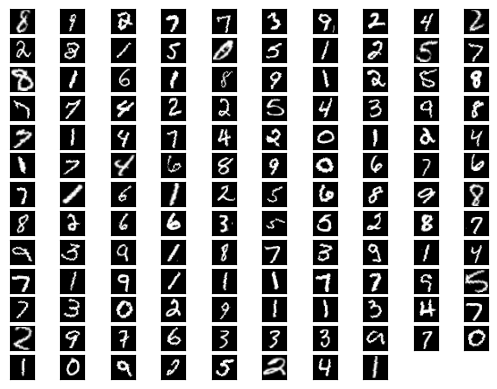

In [3]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [4]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2925 Batch_id=468 Accuracy=72.73: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]

[69.52557825426304, 94.55651142094335, 61.95031889895938, 84.35817974229326, 59.038000684697025, 70.7802988378528, 77.39101047651234, 80.60654429369514, 75.88446419415484, 49.15111783493024]


Test set: Average loss: 0.2537, Accuracy: 9575/10000 (95.75%)

[97.34693877551021, 99.11894273127754, 93.4108527131783, 96.93069306930693, 96.43584521384929, 95.2914798206278, 98.32985386221294, 95.3307392996109, 93.94250513347022, 91.0802775024777]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1878 Batch_id=468 Accuracy=94.48: 100%|██████████| 469/469 [00:24<00:00, 19.36it/s]

[95.37396589566099, 97.59715218036192, 93.80664652567975, 94.53596476920568, 93.6665525504964, 94.94558199594171, 96.13044947617439, 95.40303272146848, 91.57408989916253, 91.3262733232476]


Test set: Average loss: 0.1097, Accuracy: 9742/10000 (97.42%)

[98.26530612244898, 99.38325991189427, 97.48062015503875, 97.62376237623762, 97.25050916496944, 98.31838565022422, 97.39039665970772, 98.54085603112841, 95.68788501026694, 94.05351833498513]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1133 Batch_id=468 Accuracy=96.04: 100%|██████████| 469/469 [00:24<00:00, 19.37it/s]

[97.02853283808881, 98.1459507564521, 95.21651560926485, 95.98760397977492, 95.60082163642588, 96.49511160302528, 97.11051030753633, 96.63208300079809, 93.744659032644, 94.0998487140696]


Test set: Average loss: 0.0873, Accuracy: 9771/10000 (97.71%)

[98.57142857142858, 99.47136563876651, 97.77131782945736, 99.10891089108911, 96.33401221995926, 97.42152466367713, 98.43423799582463, 96.40077821011673, 98.97330595482546, 94.44995044598612]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1232 Batch_id=468 Accuracy=96.60: 100%|██████████| 469/469 [00:24<00:00, 19.52it/s]

[97.6194496032416, 98.23494512014238, 96.00537092984223, 96.46061001467949, 96.64498459431702, 96.86404722375946, 97.73572152754309, 96.93535514764565, 94.65048709622288, 94.58732560094133]


Test set: Average loss: 0.0672, Accuracy: 9820/10000 (98.20%)

[99.6938775510204, 99.55947136563876, 97.77131782945736, 99.4059405940594, 96.63951120162932, 98.4304932735426, 97.39039665970772, 98.92996108949417, 97.5359342915811, 96.43211100099109]
Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0709 Batch_id=303 Accuracy=96.96:  65%|██████▍   | 304/469 [00:16<00:08, 18.52it/s]


KeyboardInterrupt: 

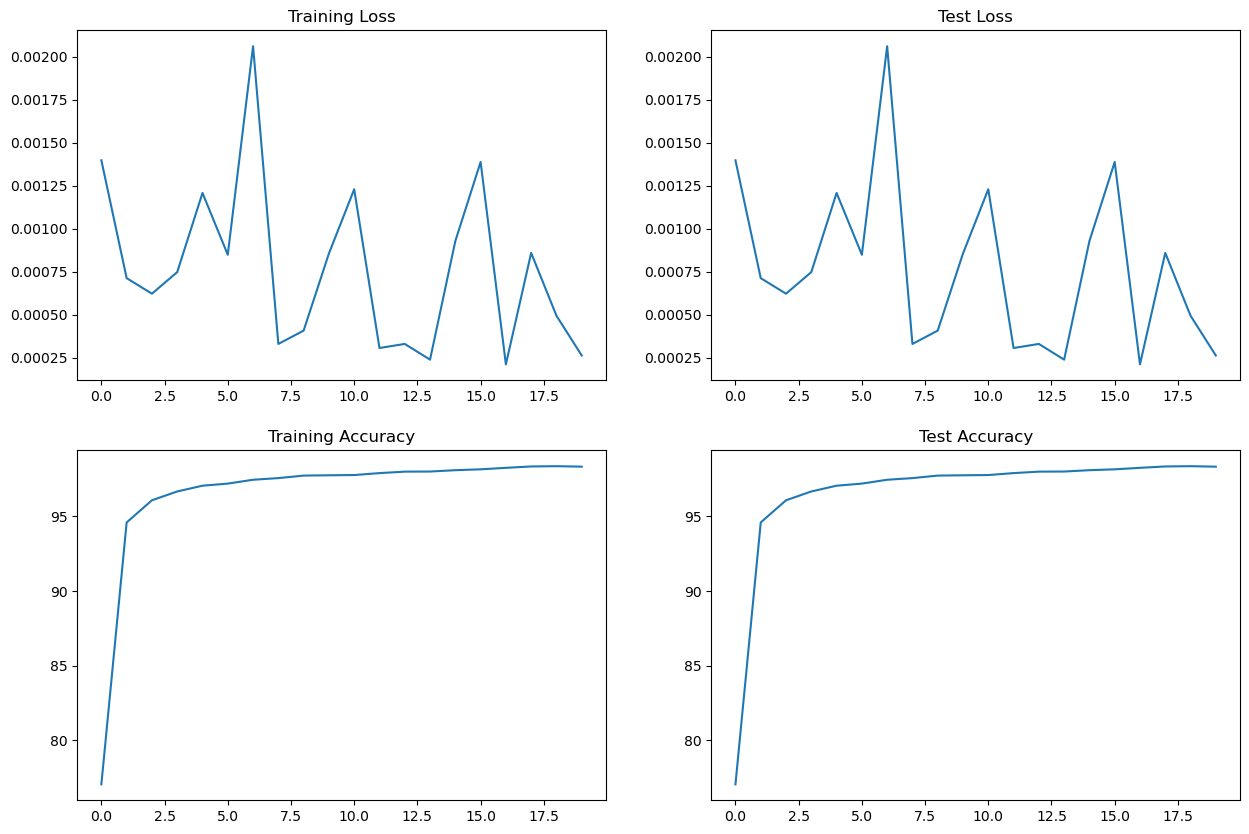

In [4]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)